In [28]:
pip install imblearn

     |████████████████████████████████| 167 kB 4.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
url="https://bd29ee0e-54ab-4daa-9671-d153865d1620.usrfiles.com/ugd/bd29ee_40bed00a739b4aeda299c0b28c01a8cd.csv"
df=pd.read_csv(url,header=None,na_values=["?"])
df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1,0.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,...,150.0,7.1,0.70,1.0,3.5,0.5,NaN,NaN,NaN,1
1,0,NaN,0,0.0,0.0,0.0,1.0,1,NaN,NaN,...,NaN,NaN,NaN,1.0,1.8,NaN,NaN,NaN,NaN,1
2,1,0.0,1,1.0,0.0,1.0,0.0,1,0.0,1.0,...,109.0,7.0,2.10,5.0,13.0,0.1,28.0,6.0,16.0,1
3,1,1.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,...,174.0,8.1,1.11,2.0,15.7,0.2,NaN,NaN,NaN,0
4,1,1.0,1,1.0,0.0,1.0,0.0,1,0.0,1.0,...,109.0,6.9,1.80,1.0,9.0,NaN,59.0,15.0,22.0,1


In [2]:
df.shape

(165, 50)

In [3]:
df1=df.dropna(axis=1,thresh=0.8*df.shape[0])

In [4]:
df1.shape

(165, 40)

In [5]:
df2=df1.dropna(thresh=0.8*df1.shape[1])

In [6]:
df2.shape

(161, 40)

In [7]:
df2=df2.rename(columns={49:"Class"})

In [8]:
y=df2[["Class"]]
y.groupby("Class")["Class"].count()

Class
0    63
1    98
Name: Class, dtype: int64

In [9]:
df2=df2.fillna(df2.mean())

In [10]:
df2.isna().any()

0        False
1        False
2        False
3        False
5        False
6        False
7        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
18       False
19       False
20       False
21       False
22       False
23       False
26       False
27       False
28       False
29       False
30       False
31       False
32       False
33       False
34       False
35       False
36       False
37       False
38       False
39       False
40       False
41       False
42       False
43       False
44       False
Class    False
dtype: bool

In [11]:
X=df2.drop(["Class"],axis=1)
X.head()

,0,1,2,3,5,6,7,10,11,12,...,35,36,37,38,39,40,41,42,43,44
0,1,0.0,1,0.0,0.0,0.0,1,1.0,0.131579,1.0,...,3.4,2.1,34.0,41.0,183.0,150.0,7.1,0.70,1.0,3.5
2,1,0.0,1,1.0,1.0,0.0,1,0.0,0.000000,0.0,...,3.3,0.4,58.0,68.0,202.0,109.0,7.0,2.10,5.0,13.0
3,1,1.0,1,0.0,0.0,0.0,1,1.0,0.000000,0.0,...,3.7,0.4,16.0,64.0,94.0,174.0,8.1,1.11,2.0,15.7
4,1,1.0,1,1.0,1.0,0.0,1,0.0,0.000000,0.0,...,4.1,0.7,147.0,306.0,173.0,109.0,6.9,1.80,1.0,9.0
5,1,0.0,1,0.0,0.0,0.0,1,0.0,1.000000,0.0,...,3.4,3.5,91.0,122.0,242.0,396.0,5.6,0.90,1.0,10.0


In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X))
X.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,0.468718,-1.385525,0.57496,-0.373841,-0.671625,-0.541969,0.308607,1.383725,0.000000,4.673513,...,-0.063118,-0.183555,-0.580011,-0.636817,-0.319150,-0.373275,-0.162769,-0.452653,-0.989488,-0.699985
1,0.468718,-1.385525,0.57496,2.990726,1.749760,-0.541969,0.308607,-0.731777,-0.400608,-0.247838,...,-0.210644,-0.494795,-0.161357,-0.327930,-0.243903,-0.617542,-0.171515,1.030547,1.248223,1.296293
2,0.468718,0.806954,0.57496,-0.373841,-0.671625,-0.541969,0.308607,1.383725,-0.400608,-0.247838,...,0.379458,-0.494795,-0.894003,-0.373691,-0.671623,-0.230290,-0.075308,-0.018287,-0.430060,1.863656
3,0.468718,0.806954,0.57496,2.990726,1.749760,-0.541969,0.308607,-0.731777,-0.400608,-0.247838,...,0.969560,-0.439870,1.391155,2.394850,-0.358753,-0.617542,-0.180261,0.712719,-0.989488,0.455755
4,0.468718,-1.385525,0.57496,-0.373841,-0.671625,-0.541969,0.308607,-0.731777,2.644010,-0.247838,...,-0.063118,0.072761,0.414294,0.289843,-0.085488,1.092326,-0.293961,-0.240767,-0.989488,0.665889


In [66]:
import numpy as np
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

test = SelectKBest(score_func=f_classif, k="all")
fit = test.fit(X, np.asarray(y).reshape(y.shape[0],))
features = fit.transform(X)
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores=scores.sort_values(by=["scores"],ascending=False)
scores

,scores
20,26.406860
25,16.224017
1,15.944653
34,14.877074
29,13.841914
22,10.648916
17,9.817432
30,8.202447
16,8.121394
23,6.514891


In [67]:
X_scores=scores[scores["scores"]>9]
len(X_scores)

7

In [68]:
Xp=X.iloc[:,X_scores.index]
Xp.head()

,20,25,1,34,29,22,17
0,-0.872477,0.375518,-1.385525,-0.373275,-0.063118,-0.661719,-0.548347
1,0.819918,-1.882849,-1.385525,-0.617542,-0.210644,0.799577,1.858288
2,-0.872477,0.234370,0.806954,-0.230290,0.379458,-0.661719,1.858288
3,-0.872477,0.657814,0.806954,-0.617542,0.969560,-0.661719,-0.548347
4,-0.026279,0.234370,-1.385525,1.092326,-0.063118,0.799577,-0.548347


In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Xp,y,test_size=(100/len(X)),random_state=0)
print(X_train.shape)
print(X_test.shape)

(61, 7)
(100, 7)


In [70]:
y_train.groupby("Class")["Class"].count()

Class
0    27
1    34
Name: Class, dtype: int64

In [71]:
from imblearn.over_sampling import SMOTE

In [72]:
sm = SMOTE(k_neighbors=10,n_jobs=-1,random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [73]:
X_res.shape

(68, 7)

In [74]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier(n_estimators=120,
                              class_weight="balanced_subsample").fit(X_res,np.asarray(y_res).reshape(y_res.shape[0],))
model1

RandomForestClassifier(class_weight='balanced_subsample', n_estimators=120)

In [75]:
from sklearn.metrics import accuracy_score
train_pred=model1.predict(X_res)
test_pred=model1.predict(X_test)
print("Accuracy on train data: ",accuracy_score(y_res,train_pred))
print("Accuracy on test data: ",accuracy_score(y_test,test_pred))

Accuracy on train data:  1.0
Accuracy on test data:  0.79


In [76]:
from sklearn.metrics import roc_auc_score
print("AUC on train data: ",roc_auc_score(y_res,train_pred))
print("AUC on test data: ",roc_auc_score(y_test,test_pred))

AUC on train data:  1.0
AUC on test data:  0.78125


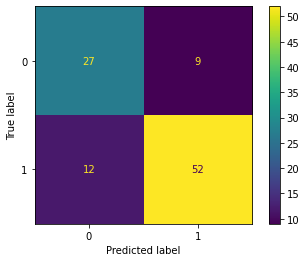

In [77]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(model1,X_test,y_test)
plt.show()

In [78]:
model2=RandomForestClassifier(n_estimators=120,
                              class_weight="balanced_subsample").fit(X_train,np.asarray(y_train).reshape(y_train.shape[0],))
model2

RandomForestClassifier(class_weight='balanced_subsample', n_estimators=120)

In [79]:
train_pred=model1.predict(X_train)
test_pred=model1.predict(X_test)
print("Accuracy on train data: ",accuracy_score(y_train,train_pred))
print("Accuracy on test data: ",accuracy_score(y_test,test_pred))

Accuracy on train data:  1.0
Accuracy on test data:  0.79


In [80]:
print("AUC on train data: ",roc_auc_score(y_train,train_pred))
print("AUC on test data: ",roc_auc_score(y_test,test_pred))

AUC on train data:  1.0
AUC on test data:  0.78125


Oversampling with SMOTE had no impact on Random Forest.

In [81]:
fit = test.fit(X, np.asarray(y).reshape(y.shape[0],))
features = fit.transform(X)
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores=scores.sort_values(by=["scores"],ascending=False)

In [82]:
X_scores=scores[scores["scores"]>8]
len(X_scores)

9

In [83]:
Xp=X.iloc[:,X_scores.index]

In [84]:
X_train,X_test,y_train,y_test=train_test_split(Xp,y,test_size=(100/len(X)),random_state=0)
print(X_train.shape)
print(X_test.shape)

(61, 9)
(100, 9)


In [85]:
from sklearn import svm
model3=svm.SVC(C=2,gamma="auto",
               random_state=0).fit(X_train,np.asarray(y_train).reshape(y_train.shape[0],))
model3

SVC(C=2, gamma='auto', random_state=0)

In [86]:
train_pred=model3.predict(X_train)
test_pred=model3.predict(X_test)
print("Accuracy on train data: ",accuracy_score(y_train,train_pred))
print("Accuracy on test data: ",accuracy_score(y_test,test_pred))

Accuracy on train data:  0.8524590163934426
Accuracy on test data:  0.79


In [87]:
print("AUC on train data: ",roc_auc_score(y_train,train_pred))
print("AUC on test data: ",roc_auc_score(y_test,test_pred))

AUC on train data:  0.8485838779956427
AUC on test data:  0.7630208333333334


In [88]:
sm = SMOTE(k_neighbors=4,n_jobs=-1,random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [89]:
X_res.shape

(68, 9)

In [90]:
model4=svm.SVC(C=2,gamma="auto",
               random_state=0).fit(X_res,np.asarray(y_res).reshape(y_res.shape[0],))
model4

SVC(C=2, gamma='auto', random_state=0)

In [91]:
train_pred=model4.predict(X_res)
test_pred=model4.predict(X_test)
print("Accuracy on train data: ",accuracy_score(y_res,train_pred))
print("Accuracy on test data: ",accuracy_score(y_test,test_pred))

Accuracy on train data:  0.8823529411764706
Accuracy on test data:  0.78


In [93]:
print("AUC on train data: ",roc_auc_score(y_res,train_pred))
print("AUC on test data: ",roc_auc_score(y_test,test_pred))

AUC on train data:  0.8823529411764707
AUC on test data:  0.7612847222222222


For SVM, oversampling with SMOTE compromised model performance on test data.

In [94]:
fit = test.fit(X, np.asarray(y).reshape(y.shape[0],))
features = fit.transform(X)
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores=scores.sort_values(by=["scores"],ascending=False)

In [95]:
X_scores=scores[scores["scores"]>10]
len(X_scores)

6

In [96]:
Xp=X.iloc[:,X_scores.index]

In [97]:
from sklearn.ensemble import GradientBoostingClassifier
model5=GradientBoostingClassifier(max_features="sqrt",max_depth=6,learning_rate=0.05,
                                  random_state=0).fit(X_train,np.asarray(y_train).reshape(y_train.shape[0],))
model5

GradientBoostingClassifier(learning_rate=0.05, max_depth=6, max_features='sqrt',
                           random_state=0)

In [98]:
train_pred=model5.predict(X_train)
test_pred=model5.predict(X_test)
print("Accuracy on train data: ",accuracy_score(y_train,train_pred))
print("Accuracy on test data: ",accuracy_score(y_test,test_pred))

Accuracy on train data:  1.0
Accuracy on test data:  0.77


In [100]:
print("AUC on train data: ",roc_auc_score(y_train,train_pred))
print("AUC on test data: ",roc_auc_score(y_test,test_pred))

AUC on train data:  1.0
AUC on test data:  0.765625


In [101]:
sm = SMOTE(n_jobs=-1,random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [102]:
X_res.shape

(68, 9)

In [103]:
model6=GradientBoostingClassifier(max_features="sqrt",learning_rate=0.03,min_samples_split=5,
                                  random_state=0).fit(X_res,np.asarray(y_res).reshape(y_res.shape[0],))
model6

GradientBoostingClassifier(learning_rate=0.03, max_features='sqrt',
                           min_samples_split=5, random_state=0)

In [104]:
train_pred=model6.predict(X_res)
test_pred=model6.predict(X_test)
print("Accuracy on train data: ",accuracy_score(y_res,train_pred))
print("Accuracy on test data: ",accuracy_score(y_test,test_pred))

Accuracy on train data:  0.9558823529411765
Accuracy on test data:  0.82


In [105]:
print("AUC on train data: ",roc_auc_score(y_res,train_pred))
print("AUC on test data: ",roc_auc_score(y_test,test_pred))

AUC on train data:  0.9558823529411764
AUC on test data:  0.8229166666666667


Confusion matrix on test data: 



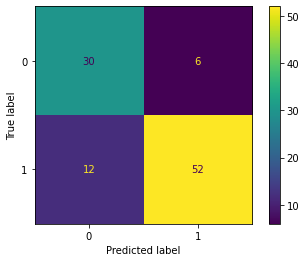

In [106]:
print("Confusion matrix on test data: \n")
plot_confusion_matrix(model6,X_test,y_test)
plt.show()

In [107]:
print("Specificity: ",30/(30+6))
print("Sensitivity: ",52/(52+12))

Specificity:  0.8333333333333334
Sensitivity:  0.8125


#### Summary: rankings of the models ranking based on performance on test data.

|Ranking|Model|No. of features used|Accuracy on test data|AUC on test data|
|-------|-----|---------------------|----------------|--------|
|1|GradientBoostingClassifier with oversampling by SMOTE|9|82%|0.823|
|2|RandomForestClassifier, with & without oversampling by SMOTE|7|79%|0.78125|
|3|Support Vector Machine, "rbf" kernel, with no oversamplin|9|79%|0.763|
|4|Support Vector Machine, "rbf" kernel, with oversampling|9|78%|0.761|
|5|GradientBoostingClassifier, with no oversampling|9|77%|0.766|